In [1]:
import scipy.io as sio
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d
from glob import glob
import json
from twpca import TWPCA

%pylab inline
%load_ext autoreload
%autoreload 2


Populating the interactive namespace from numpy and matplotlib


n_components == n_features, skipping dimensionality reduction step....
Done after 14 iterations after 18 gradient calls: -50680.14063917491


Computing hard warps: 100%|██████████| 31/31 [00:30<00:00,  1.03it/s]


n_components == n_features, skipping dimensionality reduction step....
Done after 23 iterations after 29 gradient calls: 13972.182037695351


Computing hard warps: 100%|██████████| 36/36 [00:29<00:00,  1.20it/s]


n_components == n_features, skipping dimensionality reduction step....
Done after 15 iterations after 18 gradient calls: 16663.699817081525


Computing hard warps: 100%|██████████| 14/14 [00:11<00:00,  1.18it/s]


n_components == n_features, skipping dimensionality reduction step....
Done after 14 iterations after 17 gradient calls: -28947.969419647885


Computing hard warps: 100%|██████████| 19/19 [00:15<00:00,  1.23it/s]


n_components == n_features, skipping dimensionality reduction step....
Done after 25 iterations after 30 gradient calls: -26387.939075802264


Computing hard warps: 100%|██████████| 49/49 [00:39<00:00,  1.23it/s]


n_components == n_features, skipping dimensionality reduction step....
Done after 23 iterations after 29 gradient calls: -508.75142921721176


Computing hard warps: 100%|██████████| 19/19 [00:15<00:00,  1.25it/s]

n_components == n_features, skipping dimensionality reduction step....
Fitting TWPCA. Objective after 1 gradient calls: -17388.800362522532

Done after 9 iterationse after 11 gradient calls: -25773.651497837123


Computing hard warps: 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]


n_components == n_features, skipping dimensionality reduction step....
Done after 8 iterationse after 11 gradient calls: -81656.1991277632


Computing hard warps: 100%|██████████| 31/31 [00:28<00:00,  1.09it/s]

n_components == n_features, skipping dimensionality reduction step....
Fitting TWPCA. Objective after 1 gradient calls: 4705.219826967409

Done after 15 iterations after 17 gradient calls: -14942.870603917789


Computing hard warps: 100%|██████████| 14/14 [00:15<00:00,  1.12s/it]


n_components == n_features, skipping dimensionality reduction step....
Done after 19 iterations after 25 gradient calls: -16588.751621304866


Computing hard warps: 100%|██████████| 14/14 [00:13<00:00,  1.02it/s]


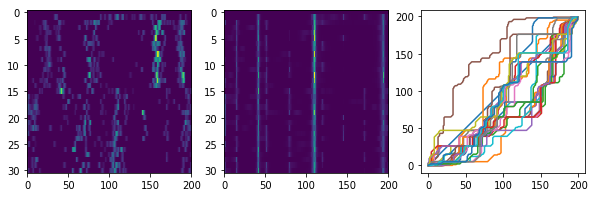

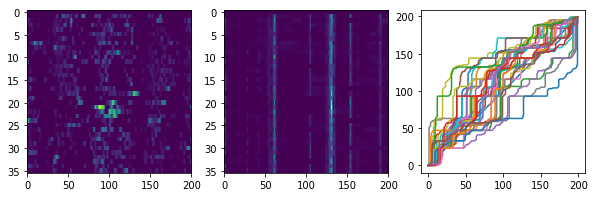

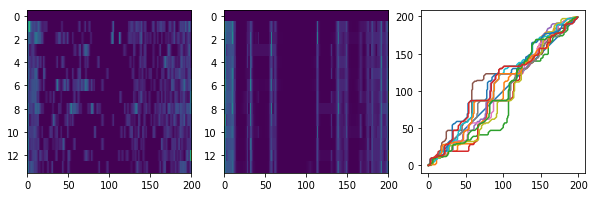

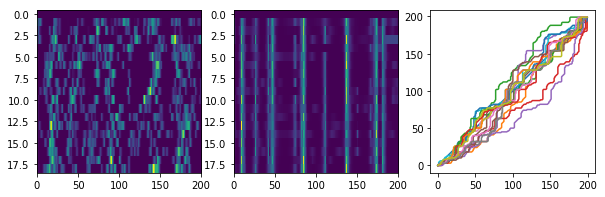

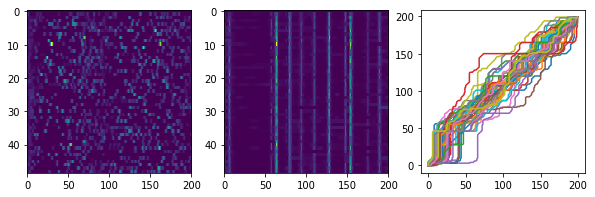

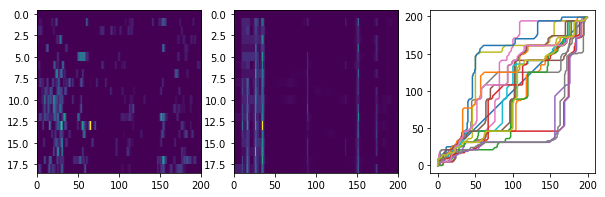

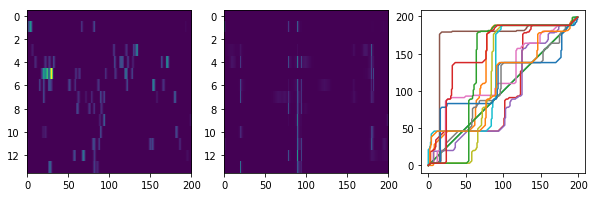

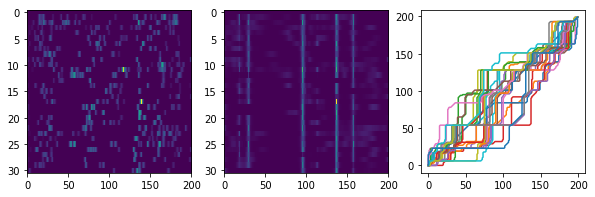

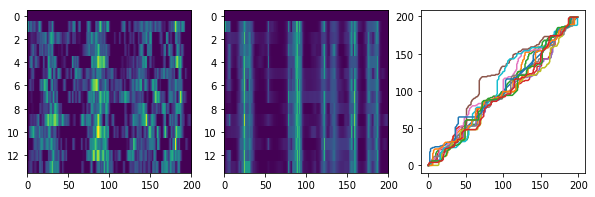

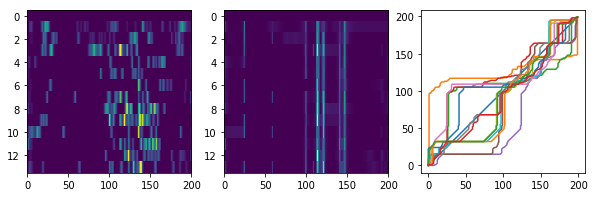

In [13]:
baseDir = "/Users/markplitt/Dropbox/Malcolms_VR_data/twPCA_Mats/"
files = glob(baseDir+"twPCA_*.mat")
cell_suffix = [i.split(baseDir+"twPCA_")[1] for i in files]
cell_suffix = [i.split(".mat")[0] for i in cell_suffix]


for i, f  in enumerate(files[0:10]):
    
    matDat = sio.loadmat(f)
    spikeMat = np.expand_dims(gaussian_filter1d(matDat['timeSpikeMat'],10,axis = 1),axis=2)
    spikeMat[np.isnan(spikeMat)]=0.
    frMat = np.expand_dims(matDat['frTrialMat'],axis=2)
    
    model = TWPCA(n_components=1, smoothness=10)
    model.fit(frMat)
    aligned_data = model.soft_transform(frMat) # aligns each trial to barycenter
    
    figure(figsize=(10,3))
    subplot(131)
    imshow(np.squeeze(frMat),aspect='auto')
    subplot(132)
    imshow(np.squeeze(aligned_data),aspect='auto')
    
    subplot(133)
    for trial in model.hard_warps:
        plot(trial[:,0], trial[:,1])
    
    #subplot(224)
    #imshow(model.soft_warps[0],aspect='auto')

In [16]:
model.soft_warps[0].shape

(200, 200)